In [1]:
from rdkit import Chem
from utils import spec2des
import utils
from utils.img2spec import train_number_model, Img2Spec
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from ase import io
from copy import deepcopy
%config InlineBackend.figure_format = 'svg'
import warnings
warnings.filterwarnings("ignore")


doyle_data = pd.read_csv('dataset/yield_dataset.csv')
doyle_des_additive = pd.read_csv('dataset/additive.csv')
additive_map = pd.read_csv('smiles/additive-list.csv')
doyle_des_base = pd.read_csv('dataset/base.csv')
base_map = pd.read_csv('smiles/base-list.csv')
doyle_des_ligand = pd.read_csv('dataset/ligand.csv')
ligand_map = pd.read_csv('smiles/ligand-list.csv')
doyle_des_aryl_halide = pd.read_csv('dataset/aryl_halide.csv')
aryl_halide_map = pd.read_csv('smiles/aryl_halide-list.csv')


doyle_data = utils.spec2des.format_smi(doyle_data, 'Aryl halide')
doyle_data = utils.spec2des.format_smi(doyle_data, 'Base')
doyle_data = utils.spec2des.format_smi(doyle_data, 'Ligand')
doyle_data = utils.spec2des.format_smi(doyle_data, 'Additive')
doyle_data

/home/tmj/anaconda3/envs/spec/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Ligand,Additive,Base,Aryl halide,Target
0,COc1ccc(OC)c(P([C@]23C[C@H]4C[C@H](C[C@H](C4)C...,Cc1cc(C)on1,CCN=P(N=P(N(C)C)(N(C)C)N(C)C)(N(C)C)N(C)C,Clc1ccccn1,70.410458
1,COc1ccc(OC)c(P([C@]23C[C@H]4C[C@H](C[C@H](C4)C...,COC(=O)c1ccno1,CCN=P(N=P(N(C)C)(N(C)C)N(C)C)(N(C)C)N(C)C,Brc1ccccn1,11.064457
2,CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)C2CCCCC2...,COC(=O)c1ccno1,CCN=P(N=P(N(C)C)(N(C)C)N(C)C)(N(C)C)N(C)C,CCc1ccc(I)cc1,10.223550
3,COc1ccc(OC)c(P(C(C)(C)C)C(C)(C)C)c1-c1c(C(C)C)...,CCOC(=O)c1cnoc1,CN1CCCN2CCCN=C12,FC(F)(F)c1ccc(Cl)cc1,20.083383
4,COc1ccc(OC)c(P([C@]23C[C@H]4C[C@H](C[C@H](C4)C...,Cc1cc(C)on1,CN1CCCN2CCCN=C12,COc1ccc(Cl)cc1,0.492663
...,...,...,...,...,...
3950,CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)C2CCCCC2...,c1ccc(-c2cnoc2)cc1,CCN=P(N=P(N(C)C)(N(C)C)N(C)C)(N(C)C)N(C)C,COc1ccc(Br)cc1,4.344677
3951,COc1ccc(OC)c(P(C(C)(C)C)C(C)(C)C)c1-c1c(C(C)C)...,Cc1cc(-n2cccc2)no1,CN1CCCN2CCCN=C12,COc1ccc(Br)cc1,47.156275
3952,COc1ccc(OC)c(P(C(C)(C)C)C(C)(C)C)c1-c1c(C(C)C)...,CCOC(=O)c1cnoc1,CN(C)C(=NC(C)(C)C)N(C)C,FC(F)(F)c1ccc(Cl)cc1,0.701552
3953,COc1ccc(OC)c(P([C@]23C[C@H]4C[C@H](C[C@H](C4)C...,c1ccc(CN(Cc2ccccc2)c2ccno2)cc1,CCN=P(N=P(N(C)C)(N(C)C)N(C)C)(N(C)C)N(C)C,FC(F)(F)c1ccc(Cl)cc1,15.561565


# Encode

## spec

use Img2Spec to recognize spectrum vector from image

In [2]:
# train_number_model(output_path='./model/recog_label_model_test.pth')
spec_path = 'sciFinder-spectrum'
number_model_path = './model/recog_label_model_test.pth'
digit_spec_path = 'digit_spec'
# for spec_type in ('IR', 'MS', 'HNMR', 'CNMR'):
for spec_type in ('HNMR', 'CNMR'):
    Img2Spec('{}/{}'.format(spec_path, spec_type), number_model_path,
             spec_type, '{}'.format(digit_spec_path)).img_process()

success, sciFinder-spectrum/HNMR/1120-90-7.png
success, sciFinder-spectrum/HNMR/696-62-8.png
success, sciFinder-spectrum/HNMR/402-43-7.png
success, sciFinder-spectrum/HNMR/626-55-1.png
success, sciFinder-spectrum/HNMR/98-56-6.png
success, sciFinder-spectrum/HNMR/109-09-1.png
success, sciFinder-spectrum/HNMR/623-12-1.png
success, sciFinder-spectrum/HNMR/25309-64-2.png
success, sciFinder-spectrum/HNMR/455-13-0.png
success, sciFinder-spectrum/HNMR/1585-07-5.png
success, sciFinder-spectrum/HNMR/622-98-0.png
success, sciFinder-spectrum/HNMR/626-60-8.png
success, sciFinder-spectrum/HNMR/104-92-7.png
success, sciFinder-spectrum/HNMR/5029-67-4.png
success, sciFinder-spectrum/HNMR/109-04-6.png
success, sciFinder-spectrum/CNMR/1120-90-7.png
success, sciFinder-spectrum/CNMR/696-62-8.png
success, sciFinder-spectrum/CNMR/402-43-7.png
success, sciFinder-spectrum/CNMR/626-55-1.png
success, sciFinder-spectrum/CNMR/98-56-6.png
success, sciFinder-spectrum/CNMR/109-09-1.png
success, sciFinder-spectrum/CN

In the collected spectra, the minimum spacing between the two peaks in the CNMR spectrum is about 2 ppm, while the minimum spacing between the two peaks in the HNMR spectrum is about 0.2 ppm, here first set the super-reference interval to 2 and 0.2, respectively.

In [3]:
cas_map = pd.read_csv('dataset/cas_map.csv').drop('Unnamed: 0', axis=1)
order_map = aryl_halide_map['Aryl_halide_SMILES'].to_frame()
order_map.columns = ['Aryl halide']
cas_map = order_map.merge(cas_map)
digit_spec_path = 'digit_spec'

# formated_IR = utils.spec2des.drop_zero(utils.spec2des.format_ir_no_exp(cas_map, digit_spec_path))
formated_HNMR = utils.spec2des.format_hnmr_no_exp(
    cas_map, digit_spec_path, start=1.5, end=10.0, interval=0.2, lower_limit=0.01)
formated_CNMR = utils.spec2des.format_cnmr_no_exp(
    cas_map, digit_spec_path, start=40.0, end=210.0, interval=2, lower_limit=0.01)

aryl_halide_spec = formated_CNMR.merge(formated_HNMR).merge(cas_map).drop('cas', axis=1)

In [4]:
aryl_halide_spec_binary = aryl_halide_spec.drop('Aryl halide', axis=1).applymap(lambda x: 1 if x > 0 else x)
aryl_halide_spec_binary.insert(loc=len(aryl_halide_spec.columns)-1, column='Aryl halide', value=aryl_halide_spec['Aryl halide'])

## spec predicted by nmrdb and encoded by spec2des

In [5]:
additive_map = pd.read_csv('smiles/additive-list.csv')
base_map = pd.read_csv('smiles/base-list.csv')
ligand_map = pd.read_csv('smiles/ligand-list.csv')
aryl_halide_map = pd.read_csv('smiles/aryl_halide-list.csv')


for index, row in cas_map.iterrows():
    temp_df = spec2des.clean_xy('HNMR', row['Aryl halide'], spec_path='nmrdb_spec/xy')
    temp_df.to_csv('nmrdb_spec/xy/formated_HNMR/{}_HNMR.csv'.format(row['cas']))
    temp_df = spec2des.clean_xy('CNMR', row['Aryl halide'], spec_path='nmrdb_spec/xy')
    temp_df.to_csv('nmrdb_spec/xy/formated_CNMR/{}_CNMR.csv'.format(row['cas']))
    
for index, row in base_map.iterrows():
    temp_df = spec2des.clean_xy('HNMR', row['CAS'], spec_path='nmrdb_spec/xy')
    temp_df.to_csv('nmrdb_spec/xy/formated_HNMR/{}_HNMR.csv'.format(row['CAS']))
    temp_df = spec2des.clean_xy('CNMR', row['CAS'], spec_path='nmrdb_spec/xy')
    temp_df.to_csv('nmrdb_spec/xy/formated_CNMR/{}_CNMR.csv'.format(row['CAS']))

for index, row in additive_map.iterrows():
    temp_df = spec2des.clean_xy('HNMR', row['Additive_SMILES'], spec_path='nmrdb_spec/xy')
    temp_df.to_csv(
        'nmrdb_spec/xy/formated_HNMR/{}_HNMR.csv'.format(row['Additive_SMILES']))
    temp_df = spec2des.clean_xy('CNMR', row['Additive_SMILES'], spec_path='nmrdb_spec/xy')
    temp_df.to_csv(
        'nmrdb_spec/xy/formated_CNMR/{}_CNMR.csv'.format(row['Additive_SMILES']))

for index, row in ligand_map.iterrows():
    temp_df = spec2des.clean_xy('HNMR', row['CAS'], spec_path='nmrdb_spec/xy')
    temp_df.to_csv('nmrdb_spec/xy/formated_HNMR/{}_HNMR.csv'.format(row['CAS']))
    temp_df = spec2des.clean_xy('CNMR', row['CAS'], spec_path='nmrdb_spec/xy')
    temp_df.to_csv('nmrdb_spec/xy/formated_CNMR/{}_CNMR.csv'.format(row['CAS']))
    
aryl_halide_nmrdb_hnmr = utils.spec2des.format_hnmr_no_exp(
    cas_map, 'nmrdb_spec/xy/formated_HNMR', 'cas', 'aryl-halide', start=1.5, end=10.0, interval=0.5)
aryl_halide_nmrdb_cnmr = utils.spec2des.format_cnmr_no_exp(
    cas_map, 'nmrdb_spec/xy/formated_CNMR', 'cas', 'aryl-halide', start=40.0, end=210.0, interval=2.5)
base_nmrdb_hnmr = utils.spec2des.format_hnmr_no_exp(
    base_map, 'nmrdb_spec/xy/formated_HNMR', 'CAS', 'base', start=1.5, end=10.0, interval=0.5)
base_nmrdb_cnmr = utils.spec2des.format_cnmr_no_exp(
    base_map, 'nmrdb_spec/xy/formated_CNMR', 'CAS', 'base', start=40.0, end=210.0, interval=2.5)
additive_nmrdb_hnmr = utils.spec2des.format_hnmr_no_exp(
    additive_map, 'nmrdb_spec/xy/formated_HNMR', 'Additive_SMILES', 'additive', start=1.5, end=10.0, interval=0.5)
additive_nmrdb_cnmr = utils.spec2des.format_cnmr_no_exp(
    additive_map, 'nmrdb_spec/xy/formated_CNMR', 'Additive_SMILES', 'additive', start=40.0, end=210.0, interval=2.5)
ligand_nmrdb_hnmr = utils.spec2des.format_hnmr_no_exp(
    ligand_map, 'nmrdb_spec/xy/formated_HNMR', 'CAS', 'ligand', start=1.5, end=10.0, interval=0.5)
ligand_nmrdb_cnmr = utils.spec2des.format_cnmr_no_exp(
    ligand_map, 'nmrdb_spec/xy/formated_CNMR', 'CAS', 'ligand', start=40.0, end=210.0, interval=2.5)

base_nmrdb_hnmr = base_nmrdb_hnmr.merge(base_map)
base_nmrdb_hnmr.drop(['CAS', 'component', 'name'], axis=1, inplace=True)
base_nmrdb_hnmr = utils.spec2des.format_smi(
    base_nmrdb_hnmr, 'Base_SMILES').rename(columns={'Base_SMILES': 'Base'})
base_nmrdb_cnmr = base_nmrdb_cnmr.merge(base_map)
base_nmrdb_cnmr.drop(['CAS', 'component', 'name'], axis=1, inplace=True)
base_nmrdb_cnmr = utils.spec2des.format_smi(
    base_nmrdb_cnmr, 'Base_SMILES').rename(columns={'Base_SMILES': 'Base'})
additive_nmrdb_hnmr = additive_nmrdb_hnmr.merge(additive_map)
additive_nmrdb_hnmr.drop(['component', 'name'], axis=1, inplace=True)
additive_nmrdb_hnmr = utils.spec2des.format_smi(
    additive_nmrdb_hnmr, 'Additive_SMILES').rename(columns={'Additive_SMILES': 'Additive'})
additive_nmrdb_cnmr = additive_nmrdb_cnmr.merge(additive_map)
additive_nmrdb_cnmr.drop(['component', 'name'], axis=1, inplace=True)
additive_nmrdb_cnmr = utils.spec2des.format_smi(
    additive_nmrdb_cnmr, 'Additive_SMILES').rename(columns={'Additive_SMILES': 'Additive'})
ligand_nmrdb_hnmr = ligand_nmrdb_hnmr.merge(ligand_map)
ligand_nmrdb_hnmr.drop(['CAS', 'component', 'name'], axis=1, inplace=True)
ligand_nmrdb_hnmr = utils.spec2des.format_smi(
    ligand_nmrdb_hnmr, 'Ligand_SMILES').rename(columns={'Ligand_SMILES': 'Ligand'})
ligand_nmrdb_cnmr = ligand_nmrdb_cnmr.merge(ligand_map)
ligand_nmrdb_cnmr.drop(['CAS', 'component', 'name'], axis=1, inplace=True)
ligand_nmrdb_cnmr = utils.spec2des.format_smi(
    ligand_nmrdb_cnmr, 'Ligand_SMILES').rename(columns={'Ligand_SMILES': 'Ligand'})

base_nmrdb = base_nmrdb_cnmr.merge(base_nmrdb_hnmr)
ligand_nmrdb = ligand_nmrdb_cnmr.merge(ligand_nmrdb_hnmr)
additive_nmrdb = additive_nmrdb_cnmr.merge(additive_nmrdb_hnmr)
aryl_halide_nmrdb = aryl_halide_nmrdb_cnmr.merge(aryl_halide_nmrdb_hnmr).merge(cas_map).drop('cas', axis=1)

## descriptors used by Doyle

In [6]:
select_feature = pd.read_csv('dataset/output_table.csv')

base_standard_smiles = []
additive_standard_smiles = []
ligand_standard_smiles = []
aryl_halide_standard_smiles = []
for index, row in additive_map.iterrows():
    additive_mol = Chem.MolFromSmiles(row['Additive_SMILES'])
    additive_smi = Chem.MolToSmiles(additive_mol)
    additive_standard_smiles.append(additive_smi)
for index, row in base_map.iterrows():
    base_mol = Chem.MolFromSmiles(row['Base_SMILES'])
    base_smi = Chem.MolToSmiles(base_mol)
    base_standard_smiles.append(base_smi)
for index, row in ligand_map.iterrows():
    ligand_mol = Chem.MolFromSmiles(row['Ligand_SMILES'])
    ligand_smi = Chem.MolToSmiles(ligand_mol)
    ligand_standard_smiles.append(ligand_smi)
for index, row in aryl_halide_map.iterrows():
    aryl_halide_mol = Chem.MolFromSmiles(row['Aryl_halide_SMILES'])
    aryl_halide_smi = Chem.MolToSmiles(aryl_halide_mol)
    aryl_halide_standard_smiles.append(aryl_halide_smi)


additive_map['Additive_SMILES'] = additive_standard_smiles
ligand_map['Ligand_SMILES'] = ligand_standard_smiles
base_map['Base_SMILES'] = base_standard_smiles
aryl_halide_map['Aryl_halide_SMILES'] = aryl_halide_standard_smiles

ligand_doyle = doyle_des_ligand.merge(ligand_map, on='name')
base_doyle = doyle_des_base.merge(base_map, on='name')
additive_doyle = doyle_des_additive.merge(additive_map, on='name')
aryl_halide_doyle = doyle_des_aryl_halide.merge(aryl_halide_map, on='name')

ligand_standard_smiles = ligand_doyle['Ligand_SMILES']
ligand_doyle.drop(['name', 'component', 'CAS',
                  'Ligand_SMILES'], axis=1, inplace=True)
ligand_doyle = (ligand_doyle-ligand_doyle.min()) / \
    (ligand_doyle.max()-ligand_doyle.min())
base_standard_smiles = base_doyle['Base_SMILES']
base_doyle.drop(['name', 'component', 'CAS', 'Base_SMILES'],
                axis=1, inplace=True)
base_doyle = (base_doyle-base_doyle.min())/(base_doyle.max()-base_doyle.min())
additive_standard_smiles = additive_doyle['Additive_SMILES']
additive_doyle.drop(
    ['name', 'component', 'Additive_SMILES'], axis=1, inplace=True)
additive_doyle = (additive_doyle-additive_doyle.min()) / \
    (additive_doyle.max()-additive_doyle.min())
aryl_halide_standard_smiles = aryl_halide_doyle['Aryl_halide_SMILES']
aryl_halide_doyle.drop(
    ['name', 'component', 'Aryl_halide_SMILES'], axis=1, inplace=True)

aryl_halide_doyle = (aryl_halide_doyle-aryl_halide_doyle.min()) / \
    (aryl_halide_doyle.max()-aryl_halide_doyle.min())

additive_doyle['Additive'] = additive_standard_smiles
ligand_doyle['Ligand'] = ligand_standard_smiles
base_doyle['Base'] = base_standard_smiles
aryl_halide_doyle['Aryl halide'] = aryl_halide_standard_smiles

In [7]:
des_map = {
    'spec': {
        'aryl halide': aryl_halide_spec
    },
    'PhysOrg': {
        'base': base_doyle,
        'ligand': ligand_doyle,
        'additive': additive_doyle,
        'aryl halide': aryl_halide_doyle
    },
    'nmrdb spec': {
        'base': base_nmrdb,
        'ligand': ligand_nmrdb,
        'additive': additive_nmrdb,
        'aryl halide': aryl_halide_nmrdb
    },
    'spec binary': {
        'aryl halide': aryl_halide_spec_binary
    },
    'spec shuffle': {
        'aryl halide': aryl_halide_spec.T.sample(frac=1).T
    },
    'spec shuffle binary': {
        'aryl halide': aryl_halide_spec_binary.T.sample(frac=1).T
    }
}

# Model selection

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import TweedieRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import pearsonr
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=2022)
model_names = ['KNN', 'SVM', 'Bayes GLM', 'NN', 'RF']
model_list = [KNeighborsRegressor(weights='distance', algorithm='brute'),
              LinearSVR(loss='squared_epsilon_insensitive', random_state=2022),
              TweedieRegressor(power=1),
              MLPRegressor(activation='relu', solver='adam',
                           learning_rate='adaptive', max_iter=500, random_state=2022),
              RandomForestRegressor(n_jobs=-1, max_depth=10, n_estimators=100, random_state=2022)]

data_template = doyle_data.merge(
    des_map['PhysOrg']['base']).drop('Base', axis=1).merge(
    des_map['PhysOrg']['ligand']).drop('Ligand', axis=1).merge(
    des_map['PhysOrg']['additive']).drop('Additive', axis=1)

Since only the aryl halide part of the chemical space can be collected from publicly available databases with complete real spectral data, we describe only the aryl halide part using the spectrum descriptors, and the remaining part of the chemical space still uses the physical organic parameters designed by Doyle as descriptors. We tested the performance of this hybrid description scheme under common models versus pure physical organic parameter descriptions.

In [9]:
def my_cross_validation(X, y, kf, model, train_size=0.7, indice_train=None, indice_test=None):
    # print(1)
    if type(indice_train)==bool and type(indice_test)==bool:
        pass
    else:
        indice = X.index
        X_train, X_test, indice_train, indice_test = train_test_split(
            X, indice, train_size=train_size)
    X_train, X_test, y_train, y_test = X.iloc[indice_train], X.iloc[
        indice_test], y.iloc[indice_train], y.iloc[indice_test]
    # print(X_train)
    y_pred = []
    models = []
    r2s = []
    prs = []
    maes = []
    rmses = []
    for train_index, test_index in kf.split(y_train):
        # print(train_index, test_index)
        X_train_, X_test_, y_train_, y_test_ = X_train.iloc[train_index], X_train.iloc[
            test_index], y_train.iloc[train_index], y_train.iloc[test_index]
        model.fit(X_train_, y_train_)
        #print(model.score(X_test_, y_test_))
        models.append(deepcopy(model))
        y_pred.append(model.predict(X_test))
        valid_p, valid_y = model.predict(X_test), y_test
        r2 = r2_score(valid_y, valid_p)
        pr = pearsonr(valid_y, valid_p)[0]
        mae = mean_absolute_error(valid_y, valid_p)
        rmse = np.sqrt(mean_squared_error(valid_y, valid_p))
        # print(r2)
        r2s.append(r2)
        prs.append(pr)
        maes.append(mae)
        rmses.append(rmse)
    valid_p, valid_y = np.array(y_pred).mean(axis=0), y_test
    r2_ = np.array(r2s).mean(axis=0)
    pr_ = np.array(prs).mean(axis=0)
    mae_ = np.array(maes).mean(axis=0)
    rmse_ = np.array(rmses).mean(axis=0)
    return r2_, pr_, mae_, rmse_, models, r2s, prs, maes, rmses, valid_p, valid_y

In [10]:
data_template = doyle_data.merge(
    des_map['PhysOrg']['base']).drop('Base', axis=1).merge(
    des_map['PhysOrg']['ligand']).drop('Ligand', axis=1).merge(
    des_map['PhysOrg']['additive']).drop('Additive', axis=1)

descriptor_name = ['spectrum descriptor', 'PhysOrg']
model_selection_matrix = pd.DataFrame(columns=model_names, index=[
                                      'spectrum descriptor', 'PhysOrg'], dtype=np.float32)
np.random.seed(2022)
i = 0
indice = data_template.index
X_train, X_test, indice_train, indice_test = train_test_split(
    data_template, indice, train_size=0.7)
for model in model_list:
    j = 0
    for aryl_halide_des in [des_map['spec']['aryl halide'], des_map['PhysOrg']['aryl halide']]:
        data = data_template.merge(
            aryl_halide_des).drop('Aryl halide', axis=1)
        X = data.drop('Target', axis=1)
        y = data['Target']
        r2, pr, mae, rmse, models, r2s, prs, maes, rmses, valid_p, valid_y = my_cross_validation(
            X, y, model=model, kf=kf, indice_train=indice_train, indice_test=indice_test)
        model_selection_matrix[model_names[i]][descriptor_name[j]] = r2
        j += 1
    i += 1
model_selection_matrix

,KNN,SVM,Bayes GLM,NN,RF
spectrum descriptor,0.653758,0.700046,0.666130,0.850811,0.889394
PhysOrg,0.525671,0.696535,0.583787,0.835408,0.915268


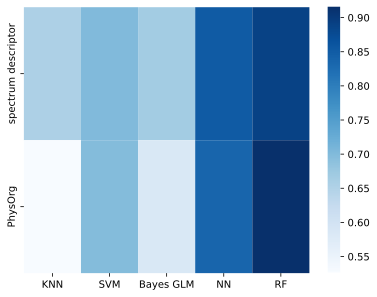

In [11]:
fig = sns.heatmap(model_selection_matrix, cmap='Blues', xticklabels=True, yticklabels=True)
plot = fig.get_figure()
plot.savefig('img/models.png',
             format='png', dpi=200, bbox_inches='tight')

The results of the model selection show that the best results can be achieved using the RF model

# Resolution selection

In [12]:
interval_hnmrs = (0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.25, 0.5, 1, 2.5, 5)
interval_cnmrs = (0.1, 0.2, 0.3, 0.4, 0.5, 1, 2.5, 5, 10, 25, 50)
r2_map = pd.DataFrame(columns=interval_cnmrs, index=interval_hnmrs, dtype=np.float32)
r2_map.columns.name = 'CNMR interval'
r2_map.index.name = 'HNMR interval'
pr_map = deepcopy(r2_map)
mae_map = deepcopy(r2_map)
rmse_map = deepcopy(r2_map)

In [13]:
# np.random.seed(2023)
kf = KFold(n_splits=10, shuffle=True, random_state=114514)
indice = data_template.index
X_train, X_test, indice_train, indice_test = train_test_split(
    data_template, indice, train_size=0.7)
model = RandomForestRegressor(n_jobs=-1, max_depth=10, n_estimators=100, random_state=114514)

def test_interval(interval_hnmr=0.25,
                  interval_cnmr=2.5,
                  lower_limit=0.01,
                  pre_data=data_template,
                  model=model,
                  indice_train=None,
                  indice_test=None):
    formated_HNMR_temp = utils.spec2des.format_hnmr_no_exp(
        cas_map, digit_spec_path, start=1.5, end=10.0, interval=interval_hnmr, lower_limit=lower_limit)
    formated_CNMR_temp = utils.spec2des.format_cnmr_no_exp(
        cas_map, digit_spec_path, start=40.0, end=210.0, interval=interval_cnmr, lower_limit=lower_limit)

    aryl_halide_spec_temp = formated_CNMR_temp.merge(
        formated_HNMR_temp).merge(cas_map).drop('cas', axis=1)
    data_set = pre_data.merge(
        aryl_halide_spec_temp).drop('Aryl halide', axis=1)
    # print(aryl_halide_spec_temp.shape)
    X = data_set.drop('Target', axis=1)
    y = data_set['Target']
    r2, pr, mae, rmse, models, r2s, prs, maes, rmses, valid_p, valid_y = my_cross_validation(
        X, y, model=model, kf=kf, indice_train=indice_train, indice_test=indice_test)
    return r2, pr, mae, rmse


for interval_hnmr in interval_hnmrs:
    for interval_cnmr in interval_cnmrs:
        r2, pr, mae, rmse = test_interval(interval_cnmr=interval_cnmr, interval_hnmr=interval_hnmr,
                                          model=model, indice_train=indice_train, indice_test=indice_test)
        r2_map[interval_cnmr][interval_hnmr] = r2
        pr_map[interval_cnmr][interval_hnmr] = pr
        mae_map[interval_cnmr][interval_hnmr] = mae
        rmse_map[interval_cnmr][interval_hnmr] = rmse

In [14]:
r2_map

CNMR interval,0.1,0.2,0.3,0.4,0.5,1.0,2.5,5.0,10.0,25.0,50.0
HNMR interval,,,,,,,,,,,
0.01,0.854542,0.873242,0.856003,0.861401,0.867178,0.861203,0.878306,0.848661,0.869400,0.859879,0.864725
0.02,0.883373,0.876245,0.881970,0.868905,0.855121,0.885270,0.882123,0.879563,0.859107,0.867198,0.878604
0.03,0.871927,0.846608,0.875091,0.888497,0.861320,0.885512,0.870894,0.878531,0.855718,0.868184,0.851921
0.04,0.869070,0.870866,0.877323,0.881569,0.874226,0.876348,0.881763,0.867431,0.875739,0.853283,0.863678
0.05,0.851169,0.865396,0.856562,0.876230,0.869765,0.881133,0.875260,0.880793,0.871949,0.872495,0.861066
0.10,0.879711,0.893713,0.896652,0.887844,0.877072,0.889990,0.897642,0.888962,0.872253,0.898331,0.881706
0.25,0.886974,0.885906,0.879022,0.880633,0.893119,0.895326,0.886298,0.877879,0.896870,0.879991,0.876445
0.50,0.879652,0.894642,0.896110,0.883665,0.902839,0.890543,0.899497,0.902876,0.889233,0.887610,0.883487
1.00,0.873110,0.861174,0.887546,0.884035,0.887362,0.877250,0.897709,0.905716,0.894812,0.893937,0.878469


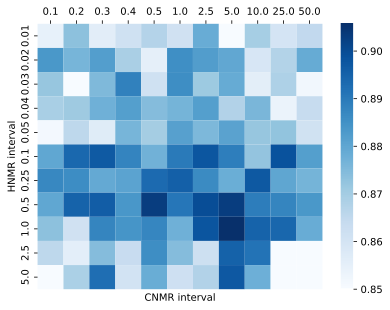

In [15]:
fig = sns.heatmap(r2_map, cmap='Blues', xticklabels=True, yticklabels=True, vmin=0.85)
fig.xaxis.tick_top()
plot = fig.get_figure()
plot.savefig('img/interval.png',
             format='png', dpi=200, bbox_inches='tight')

To determine the resolution hyperparameters in the spectrum descriptors, we calculated the predictive effect of 11 × 11 sets of HNMR and CNMR resolution combinations by 10-fold cross-validation using a more demanding RF model (limited to a maximum depth of 10). Experiments on resolution show that both too high or too low resolutions reduce the ability of the spectrum descriptors to represent the information of the spectral peaks. Too low a resolution can cause two or more similar spectral peaks to be grouped into one feature, thus preventing the model from learning their respective information; too high a resolution can confuse the same spectral peak by splitting it into several spectral peaks with smaller absorption intensities. From the results, the best results can be obtained by choosing an HNMR interval of 1 and a CNMR interval of 5. The spectrum descriptors at this combination of resolutions have a total of 26 dimensions, of which 9 dimensions are HNMR features and 17 dimensions are CNMR features.

In [16]:
formated_HNMR = utils.spec2des.format_hnmr_no_exp(
    cas_map, digit_spec_path, start=1.5, end=10.0, interval=1, lower_limit=0.01)
formated_CNMR = utils.spec2des.format_cnmr_no_exp(
    cas_map, digit_spec_path, start=40.0, end=210.0, interval=5, lower_limit=0.01)
formated_CNMR.merge(formated_HNMR).merge(cas_map).drop('cas', axis=1).columns

Index(['_CNMR_50.0~55.0', '_CNMR_55.0~60.0', '_CNMR_70.0~75.0',
       '_CNMR_80.0~85.0', '_CNMR_85.0~90.0', '_CNMR_90.0~95.0',
       '_CNMR_95.0~100.0', '_CNMR_110.0~115.0', '_CNMR_115.0~120.0',
       '_CNMR_120.0~125.0', '_CNMR_125.0~130.0', '_CNMR_130.0~135.0',
       '_CNMR_135.0~140.0', '_CNMR_140.0~145.0', '_CNMR_145.0~150.0',
       '_CNMR_150.0~155.0', '_CNMR_155.0~160.0', '_HNMR_1.5~2.5',
       '_HNMR_2.5~3.5', '_HNMR_3.5~4.5', '_HNMR_4.5~5.5', '_HNMR_5.5~6.5',
       '_HNMR_6.5~7.5', '_HNMR_7.5~8.5', '_HNMR_8.5~9.5', '_HNMR_9.5~10.5',
       'Aryl halide'],
      dtype='object')

# Learning curve

Update spectrum descriptor generation parameters

In [17]:
formated_HNMR = utils.spec2des.format_hnmr_no_exp(
    cas_map, digit_spec_path, start=1.5, end=10.0, interval=1, lower_limit=0.01)
formated_CNMR = utils.spec2des.format_cnmr_no_exp(
    cas_map, digit_spec_path, start=40.0, end=210.0, interval=5, lower_limit=0.01)

aryl_halide_spec = formated_CNMR.merge(formated_HNMR).merge(cas_map).drop('cas', axis=1)
des_map = {
    'spec': {
        'aryl halide': aryl_halide_spec
    },
    'PhysOrg': {
        'base': base_doyle,
        'ligand': ligand_doyle,
        'additive': additive_doyle,
        'aryl halide': aryl_halide_doyle
    },
    'nmrdb spec': {
        'base': base_nmrdb,
        'ligand': ligand_nmrdb,
        'additive': additive_nmrdb,
        'aryl halide': aryl_halide_nmrdb
    },
    'spec binary': {
        'aryl halide': aryl_halide_spec_binary
    },
    'spec shuffle': {
        'aryl halide': aryl_halide_spec.T.sample(frac=1).T
    },
    'spec shuffle binary': {
        'aryl halide': aryl_halide_spec_binary.T.sample(frac=1).T
    }
}

In [18]:
len(des_map['PhysOrg']['ligand'].columns)-1

64

In order to make the learning curve more rounded, a 50-fold cross-validation is used here, and the maximum depth limit of the RF model is removed in order to achieve the most stable training effect of the model.

In [19]:
rates = [int(i) for i in np.linspace(0.05, 0.9, 30)*X.shape[0]]
print(rates)
r2_list = []
r2_std_list = []
r2_train_list = []
r2_train_std_list = []
np.random.seed(12345)
model = RandomForestRegressor(n_jobs=-1, n_estimators=100)
kf_50 = KFold(n_splits=50, shuffle=True)
dataset = doyle_data.merge(
    des_map['PhysOrg']['base']).drop('Base', axis=1).merge(
    des_map['PhysOrg']['ligand']).drop('Ligand', axis=1).merge(
    des_map['PhysOrg']['additive']).drop('Additive', axis=1).merge(
    des_map['spec']['aryl halide']).drop('Aryl halide', axis=1)
X = dataset.drop('Target', axis=1)
y = dataset['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.9)
for rate in rates:
    X = dataset.drop('Target', axis=1)
    y = dataset['Target']

    y_pred = []
    models = []
    r2s = []
    r2ts = []
    maes = []
    rmses = []
    for train_index, test_index in kf_50.split(y_train):
        # print(train_index, test_index)
        try:
            X_train_, X_test_, y_train_, y_test_ = train_test_split(
                X_train, y_train, train_size=rate)
        except:
            X_train_, y_train_ = X_train, y_train
        model.fit(X_train_, y_train_)
        #print(model.score(X_test_, y_test_))
        models.append(deepcopy(model))
        y_pred.append(model.predict(X_test))
        valid_p, valid_y = model.predict(X_test), y_test
        r2 = r2_score(valid_y, valid_p)
        r2t = r2_score(model.predict(X_train_), y_train_)
        mae = mean_absolute_error(valid_y, valid_p)
        rmse = np.sqrt(mean_squared_error(valid_y, valid_p))
        r2s.append(r2)
        r2ts.append(r2t)
        maes.append(mae)
        rmses.append(rmse)

    valid_p, valid_y = np.array(y_pred).mean(axis=0), y_test
    r2 = np.array(r2s).mean(axis=0)
    r2_std = pd.DataFrame(r2s).std()[0]
    # print(r2_std)
    r2t = np.array(r2ts).mean(axis=0)
    r2t_std = pd.DataFrame(r2ts).std()[0]
    r2_list.append(r2)
    r2_train_list.append(r2t)
    r2_std_list.append(r2_std)
    r2_train_std_list.append(r2t_std)
    print(' $R^2$: {:.3}\n r2t: {:.3}\n r2std: {:.3}\n r2tstd: {:.3}'.format(
        r2, r2t, r2_std, r2t_std))
    
learning_curve = pd.DataFrame(columns=('r2', 'r2t', 'r2_std', 'r2t_std', 'num'))
learning_curve['r2'] = r2_list
learning_curve['r2t'] = r2_train_list
learning_curve['r2_std'] = r2_std_list
learning_curve['r2t_std'] = r2_train_std_list
learning_curve['num'] = rates
# learning_curve.to_csv('learn_curve.csv')
learning_curve

[197, 313, 429, 545, 661, 777, 893, 1009, 1125, 1241, 1356, 1472, 1588, 1704, 1820, 1936, 2052, 2168, 2284, 2400, 2516, 2632, 2748, 2863, 2979, 3095, 3211, 3327, 3443, 3559]
 $R^2$: 0.601
 r2t: 0.92
 r2std: 0.044
 r2tstd: 0.0148
 $R^2$: 0.692
 r2t: 0.946
 r2std: 0.0221
 r2tstd: 0.00848
 $R^2$: 0.732
 r2t: 0.956
 r2std: 0.0248
 r2tstd: 0.00712
 $R^2$: 0.768
 r2t: 0.962
 r2std: 0.0203
 r2tstd: 0.00436
 $R^2$: 0.789
 r2t: 0.967
 r2std: 0.0166
 r2tstd: 0.00355
 $R^2$: 0.802
 r2t: 0.97
 r2std: 0.0185
 r2tstd: 0.0026
 $R^2$: 0.817
 r2t: 0.972
 r2std: 0.0159
 r2tstd: 0.0025
 $R^2$: 0.833
 r2t: 0.974
 r2std: 0.0134
 r2tstd: 0.00216
 $R^2$: 0.84
 r2t: 0.975
 r2std: 0.0147
 r2tstd: 0.00196
 $R^2$: 0.853
 r2t: 0.977
 r2std: 0.0154
 r2tstd: 0.00135
 $R^2$: 0.859
 r2t: 0.979
 r2std: 0.0164
 r2tstd: 0.00168
 $R^2$: 0.863
 r2t: 0.98
 r2std: 0.0123
 r2tstd: 0.00131
 $R^2$: 0.874
 r2t: 0.981
 r2std: 0.0106
 r2tstd: 0.00121
 $R^2$: 0.879
 r2t: 0.982
 r2std: 0.0123
 r2tstd: 0.0013
 $R^2$: 0.888
 r2t: 0.9

,r2,r2t,r2_std,r2t_std,num
0,0.600771,0.919669,0.044035,0.014812,197
1,0.691796,0.945737,0.022098,0.008483,313
2,0.731509,0.956059,0.024807,0.007116,429
3,0.768168,0.962476,0.020344,0.004364,545
4,0.788716,0.967219,0.016610,0.003552,661
5,0.801816,0.969789,0.018492,0.002596,777
6,0.816789,0.971729,0.015894,0.002496,893
7,0.832922,0.974122,0.013395,0.002160,1009
8,0.839969,0.975397,0.014683,0.001958,1125
9,0.852727,0.977282,0.015382,0.001345,1241


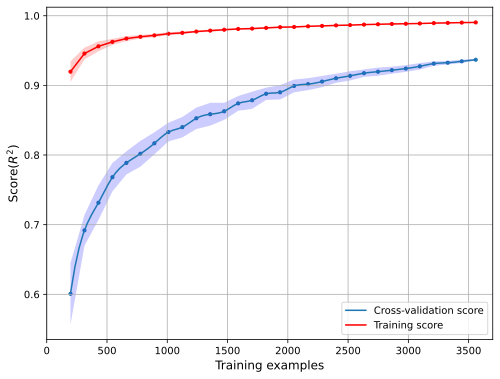

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
r2 = learning_curve['r2']
r2t = learning_curve['r2t']
r2std = learning_curve['r2_std']
r2tstd = learning_curve['r2t_std']
labels = rates


xnew = np.linspace(200, 3559, 100)
func_1 = interp1d(labels, r2, kind='cubic')
r2_new = func_1(xnew)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.plot(xnew,r2_new, '-', label = 'Cross-validation score')  # 此时即为平滑曲线'''
# ax.plot(labels, r2, '-', label = 'Cross-validation score')
ax.scatter(labels, r2, s=10)
ax.fill_between(labels, r2-r2std, r2+r2std, alpha=0.2, facecolor='b')


ax.plot(labels, r2t, '-r', label = 'Training score')
ax.scatter(labels, r2t, s=10, c='r')
ax.fill_between(labels, r2t-r2tstd, r2t+r2tstd, alpha=0.2, facecolor='r')
plt.xlim((0, 3700))
plt.legend(loc='lower right')

ax.set_xlabel("Training examples", fontsize=12)
ax.set_ylabel("Score($R^2$)", fontsize=12)
ax.grid()

plt.savefig("img/learning curve.svg")

The learning curve suggested that a sample space of over 3000 examples(about 70%) is necessary to reach the desired training performance. Therefore, the common 70/30 division can already meet the training needs of the model.

# Prediction

Based on the optimal model obtained earlier, the optimal resolution combination, and the appropriate data set partitioning ratio, we determined the hyperparameters needed for the model. The predictions obtained using the spectrum descriptor with the determined resolution combination to describe the aryl halide part of the chemical space, and the rest using the RF model with the maximum depth limit removed using the 70/30 division with a 10-fold cross-validation are as follows.

In [21]:
np.random.seed(2022)
kf = KFold(n_splits=10, shuffle=True)
model_performance_comparation = pd.DataFrame([['PhysOrg', 'PhysOrg', 'PhysOrg', 'PhysOrg', 0.92, None, None, 7.8]], columns=['Base des', 'Ligand des', 'Additive des', 'Aryl Halide des', 'R2', 'Pearson R', 'MAE', 'RMSE'])
model = RandomForestRegressor(n_jobs=-1, n_estimators=100)
dataset = doyle_data.merge(
    des_map['PhysOrg']['base']).drop('Base', axis=1).merge(
    des_map['PhysOrg']['ligand']).drop('Ligand', axis=1).merge(
    des_map['PhysOrg']['additive']).drop('Additive', axis=1).merge(
    des_map['spec']['aryl halide']).drop('Aryl halide', axis=1)
X = dataset.drop('Target', axis=1)
y = dataset['Target']

r2, pr, mae, rmse, models, r2s, prs, maes, rmses, valid_p, valid_y = my_cross_validation(X, y, model=model, kf=kf, train_size=0.7)
print(r2s)
print(rmses)
model_performance_comparation = model_performance_comparation.append({
    'Base des':'PhysOrg', 
    'Ligand des':'PhysOrg', 
    'Additive des':'PhysOrg', 
    'Aryl Halide des':'spec', 
    'R2':r2, 
    'Pearson R':pr, 
    'MAE':mae, 
    'RMSE':rmse
    }, ignore_index=True)

[0.9277995349539508, 0.9298487735920842, 0.9320498205120428, 0.9282801806056438, 0.9315042202404877, 0.9291597851928965, 0.9306206016484058, 0.9254274805739557, 0.9299888271368038, 0.9296772686473286]
[7.367519716845337, 7.2622123430369045, 7.147375735765482, 7.342955612681288, 7.1760129928217244, 7.297788017505067, 7.222151160520636, 7.487566926693484, 7.254959392605977, 7.271084212212533]


In [22]:
X.shape

(3955, 119)

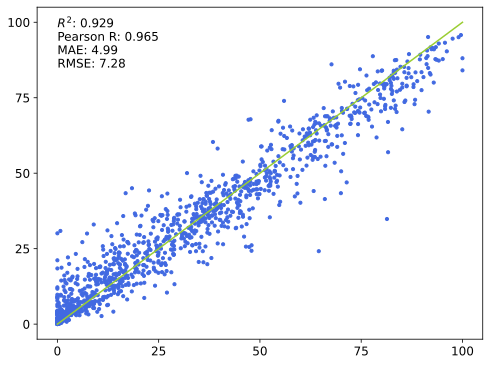

In [23]:
plt.figure(figsize=(8, 6))
plt.subplot(111)
plt.scatter(valid_y, valid_p, c='royalblue', s=10)

plt.text(0, 85, '$R^2$: {:.3}\nPearson R: {:.3}\nMAE: {:.3}\nRMSE: {:.3}'.format(
    r2, pr, mae, rmse), fontsize=12)

plt.plot([0, y.max()], [0, y.max()], c='yellowgreen')
# plt.xlabel('$yield_{Exp}$', fontsize=15)
# plt.ylabel('$yield_{ML}$', fontsize=15)
plt.xticks([0, 25, 50, 75, 100], list(
    map(str, [0, 25, 50, 75, 100])), fontsize=12)
plt.yticks([0, 25, 50, 75, 100], list(
    map(str, [0, 25, 50, 75, 100])), fontsize=12)
plt.tick_params(bottom='on', left='on')

plt.savefig('img/{}.png'.format('inner spec'), format='png', dpi=200)

# Feature selection

In [24]:
from sklearn.feature_selection import RFECV
# np.random.seed(1234)
model = RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=1234)
dataset = doyle_data.merge(
    des_map['PhysOrg']['base']).drop('Base', axis=1).merge(
    des_map['PhysOrg']['ligand']).drop('Ligand', axis=1).merge(
    des_map['PhysOrg']['additive']).drop('Additive', axis=1).merge(
    des_map['spec']['aryl halide']).drop('Aryl halide', axis=1)
X = dataset.drop('Target', axis=1)
y = dataset['Target']

score_func = 'r2'
min_features_to_select = 1

rfecv = RFECV(
    estimator=model,
    step=1,
    cv=KFold(n_splits=10, shuffle=True, random_state=1234),
    scoring=score_func,
    min_features_to_select=min_features_to_select,
    n_jobs=-1
)
#np.random.seed(1234)
rfecv.fit(X, y)
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 44


In [25]:
rfecv.get_feature_names_out(X.columns)

array(['base_*N1_electrostatic_charge', 'base_E_LUMO',
       'base_electronegativity', 'base_hardness', 'base_molecular_volume',
       'base_molecular_weight', 'base_ovality', 'base_surface_area',
       'ligand_*C11_electrostatic_charge', 'ligand_*C14_NMR_shift',
       'ligand_*C1_electrostatic_charge', 'ligand_*C3_NMR_shift',
       'ligand_*C8_NMR_shift', 'ligand_*H11_NMR_shift',
       'ligand_*H9_electrostatic_charge', 'ligand_V10_frequency',
       'ligand_V3_frequency', 'ligand_V6_frequency',
       'ligand_V7_intensity', 'ligand_V9_intensity',
       'additive_*C3_NMR_shift', 'additive_*C4_NMR_shift',
       'additive_*C4_electrostatic_charge',
       'additive_*C5_electrostatic_charge',
       'additive_*N1_electrostatic_charge',
       'additive_*O1_electrostatic_charge', 'additive_E_HOMO',
       'additive_E_LUMO', 'additive_V1_frequency',
       'additive_V1_intensity', 'additive_dipole_moment',
       'additive_molecular_volume', '_CNMR_50.0~55.0', '_CNMR_55.0~60.0',
  

Optimal number of features : 44


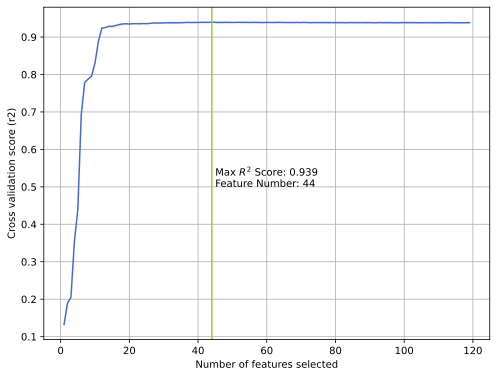

In [26]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(8, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score ({})".format(score_func))
plt.plot(
    range(min_features_to_select, len(
        rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_.mean(1), color='royalblue'
)
plt.axvline(rfecv.n_features_, color='yellowgreen')
plt.grid(None)
# plt.grid(None)
plt.text(45, 0.5, 'Max $R^2$ Score: {:.3f}\nFeature Number: {:}'.format(
    rfecv.grid_scores_.mean(1)[rfecv.n_features_], rfecv.n_features_))
plt.savefig('img/{}.png'.format('rfecv_test'), format='png', dpi=200)
plt.show()

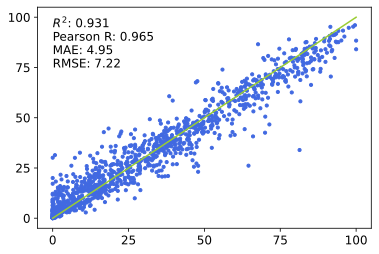

In [27]:
np.random.seed(2022)
model = RandomForestRegressor(n_jobs=-1, n_estimators=100)
kf = KFold(n_splits=10, shuffle=True)
dataset = doyle_data.merge(
    des_map['PhysOrg']['base']).drop('Base', axis=1).merge(
    des_map['PhysOrg']['ligand']).drop('Ligand', axis=1).merge(
    des_map['PhysOrg']['additive']).drop('Additive', axis=1).merge(
    des_map['spec']['aryl halide']).drop('Aryl halide', axis=1)
X_selected = dataset.drop('Target', axis=1)[rfecv.get_feature_names_out(X.columns)]
y = dataset['Target']

r2, pr, mae, rmse, models, r2s, prs, maes, rmses, valid_p, valid_y = my_cross_validation(X_selected, y, model=model, kf=kf, train_size=0.7)
plt.figure(figsize=(6, 4))
plt.subplot(111)
plt.scatter(valid_y, valid_p, c='royalblue', s=10)

plt.text(0, 75, '$R^2$: {:.3}\nPearson R: {:.3}\nMAE: {:.3}\nRMSE: {:.3}'.format(
    r2, pr, mae, rmse), fontsize=12)

plt.plot([0, y.max()], [0, y.max()], c='yellowgreen')
# plt.xlabel('$yield_{Exp}$', fontsize=15)
# plt.ylabel('$yield_{ML}$', fontsize=15)
plt.xticks([0, 25, 50, 75, 100], list(
    map(str, [0, 25, 50, 75, 100])), fontsize=12)
plt.yticks([0, 25, 50, 75, 100], list(
    map(str, [0, 25, 50, 75, 100])), fontsize=12)
plt.tick_params(bottom='on', left='on')
plt.savefig('img/{}.png'.format('inner spec selected'), format='png', dpi=200)

<Figure size 640x480 with 0 Axes>

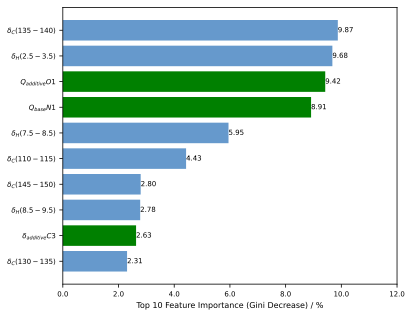

In [28]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import seaborn as sns
pd.Series(model.feature_importances_, index=X_selected.columns).sort_values(
    ascending=False)[:10]

plt.figure()
# 数据
feature = pd.Series(model.feature_importances_, index=X_selected.columns).sort_values(
    ascending=False)[:10].iloc[::-1].index
dgini = pd.Series(model.feature_importances_, index=X_selected.columns).sort_values(
    ascending=False)[:10].iloc[::-1]*100

# 图像绘制
fig, ax = plt.subplots(figsize=(6, 5))
b = ax.barh(range(len(feature)), dgini, color=['#6699CC', '#6699CC', 'green', 'green', '#6699CC',
            '#6699CC', '#6699CC', '#6699CC', 'green', '#6699CC'][::-1], label='spec')

# 添加数据标签
for rect in b:
    w = rect.get_width()
    ax.text(w, rect.get_y()+rect.get_height()/2,
            '{:.2f}'.format(w), ha='left', va='center', fontsize=7)

# 设置Y轴刻度线标签
ax.set_yticks(range(len(feature)))
# font=FontProperties(fname=r'/Library/Fonts/Songti.ttc')
ax.set_yticklabels(['$\delta_C(135-140)$', '$\delta_H(2.5-3.5)$', '$Q_{additive} O1$', '$Q_{base} N1$', '$\delta_H(7.5-8.5)$',
                   '$\delta_C(110-115)$', '$\delta_C(145-150)$', '$\delta_H(8.5-9.5)$', '$\delta_{additive} C3$', '$\delta_C(130-135)$'][::-1], fontsize=7)
ax.set_xlim(0, 12)
ax.set_xticklabels(np.linspace(0, 12, 7), fontsize=7)
plt.xlabel('Top 10 Feature Importance (Gini Decrease) / %', fontsize=8)
# plt.legend()
plot = fig.get_figure()
plot.savefig('img/feature_ranking.png',
             format='png', dpi=200, bbox_inches='tight')


In [29]:
feature

Index(['_CNMR_135.0~140.0', '_HNMR_2.5~3.5',
       'additive_*O1_electrostatic_charge', 'base_*N1_electrostatic_charge',
       '_HNMR_7.5~8.5', '_CNMR_110.0~115.0', '_CNMR_145.0~150.0',
       '_HNMR_8.5~9.5', 'additive_*C3_NMR_shift', '_CNMR_130.0~135.0'],
      dtype='object')

After feature selection, we obtained 44 main features from 119 features, and the R2 obtained by training the random forest model with these features was 0.931, which was close to the R2 value of 0.929 obtained by training with all the features, and all of them could achieve good regression results. The feature that contributes most to the model is the CNMR absorption intensity at ppm 135-140, while the features calculated by spectrum descriptor occupy three of the top-5 important features.

# Performance of automatically generated spectrum descriptors.

We also tested [NMRDB](http://www.nmrdb.org/), a tool that automatically predicts NMR spectra, allowing us to generate CNMR and HNMR spectra for most of the molecules involved in organic synthesis. We used its predicted spectra (in JCAMP format, which can be converted into key-value pairs by the [ChemInfo tool](http://www.cheminfo.org/Chemistry/Cheminformatics/Convert_a_logP_to_a_color/index.html)), processed by our tool to obtain fully virtual generated spectrum descriptors, and used these descriptors for validation on the dataset. The results show that the prediction performance of the virtually generated descriptors on this dataset is similar to the other schemes, both having close results to the physical organic descriptors.

In [30]:
model = RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=2023)
kf = KFold(n_splits=10, shuffle=True, random_state=2023)
dataset = doyle_data.merge(
    des_map['PhysOrg']['base']).drop('Base', axis=1).merge(
    des_map['PhysOrg']['ligand']).drop('Ligand', axis=1).merge(
    des_map['PhysOrg']['additive']).drop('Additive', axis=1).merge(
    des_map['nmrdb spec']['aryl halide']).drop('Aryl halide', axis=1)
X = dataset.drop('Target', axis=1)
y = dataset['Target']


r2, pr, mae, rmse, models, r2s, prs, maes, rmses, valid_p, valid_y = my_cross_validation(X, y, model=model, kf=kf, train_size=0.7)
model_performance_comparation = model_performance_comparation.append({
    'Base des':'PhysOrg', 
    'Ligand des':'PhysOrg', 
    'Additive des':'PhysOrg', 
    'Aryl Halide des':'nmrdb spec', 
    'R2':r2, 
    'Pearson R':pr, 
    'MAE':mae, 
    'RMSE':rmse
    }, ignore_index=True)

In [31]:
model = RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=2023)
kf = KFold(n_splits=10, shuffle=True, random_state=2023)
dataset = doyle_data.merge(
    des_map['nmrdb spec']['base']).drop('Base', axis=1).merge(
    des_map['nmrdb spec']['ligand']).drop('Ligand', axis=1).merge(
    des_map['nmrdb spec']['additive']).drop('Additive', axis=1).merge(
    des_map['nmrdb spec']['aryl halide']).drop('Aryl halide', axis=1)
X = dataset.drop('Target', axis=1)
y = dataset['Target']

r2, pr, mae, rmse, models, r2s, prs, maes, rmses, valid_p, valid_y = my_cross_validation(X, y, model=model, kf=kf, train_size=0.7)
model_performance_comparation = model_performance_comparation.append({
    'Base des':'nmrdb spec', 
    'Ligand des':'nmrdb spec', 
    'Additive des':'nmrdb spec', 
    'Aryl Halide des':'nmrdb spec', 
    'R2':r2, 
    'Pearson R':pr, 
    'MAE':mae, 
    'RMSE':rmse
    }, ignore_index=True)

In [32]:
model_performance_comparation

,Base des,Ligand des,Additive des,Aryl Halide des,R2,Pearson R,MAE,RMSE
0,PhysOrg,PhysOrg,PhysOrg,PhysOrg,0.920000,None,None,7.800000
1,PhysOrg,PhysOrg,PhysOrg,spec,0.929436,0.964854,4.993361,7.282963
2,PhysOrg,PhysOrg,PhysOrg,nmrdb spec,0.906864,0.952487,5.26482,8.153985
3,nmrdb spec,nmrdb spec,nmrdb spec,nmrdb spec,0.897881,0.947853,5.795985,8.723710
